## A notebook on 2D Fourier Transform on images
1. How the timeshift affects the transform at the frequency band
2. How to recover the FT
3. Why there exists a cross in the transformed image

### References
[scipy.fftpack](https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html#two-and-n-dimensional-discrete-fourier-transforms)

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
import numpy as np

## Generate a 2D Gaussian for FFT

In [3]:
def gen_gaussian(imgshape, sigma_x, sigma_y, mu_x=0, mu_y=0, step=1.0):
    # gauss = np.zeros(imgshape)
    x = np.arange(-imgshape[1]//2*step, imgshape[1]//2*step, 1*step)
    y = np.arange(-imgshape[0]//2*step, imgshape[0]//2*step, 1*step)
    X,Y = np.meshgrid(x,y)
    gauss = np.exp(-(X-mu_x)**2/(2*sigma_x**2))*np.exp(-(Y-mu_y)**2/(2*sigma_y**2))
    
    return gauss

In [17]:
imgshape = [100, 100]
img = gen_gaussian(imgshape, sigma_x=0.5, sigma_y=0.5, step=0.5)

## FFT

In [18]:
from scipy import fftpack

In [19]:
img_fft = fftpack.fftshift(fftpack.fftn(img))
img_ifft = fftpack.ifftn(fftpack.ifftshift(img_fft))

In [20]:
img_real = np.real(img_fft)
img_imag = np.imag(img_fft)
img_phase = img_real / (img_imag + 1e-5)

In [21]:
def gen_norm(img, logflag=False):
    img_min = img.min()
    img_max = img.max()
    img_norm = (img - img_min) / (img_max - img_min)
    if logflag:
        img_norm = np.log10(img_norm + 1e-5)
    
    return img_norm

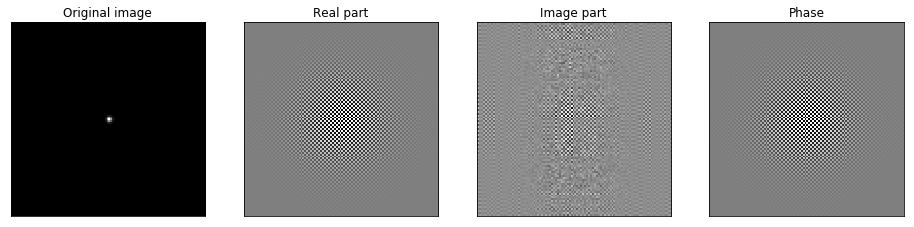

In [24]:
# Display
plt.rcParams["figure.figsize"] = [16.0, 6.0]
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1])

ax0 = plt.subplot(gs[0])
ax0.imshow(img, cmap='gray')
ax0.set_xticks([])
ax0.set_yticks([])
plt.title('Original image')

ax1 = plt.subplot(gs[1])
ax1.imshow(gen_norm(img_real), cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title('Real part')

ax2 = plt.subplot(gs[2])
ax2.imshow(gen_norm(img_imag), cmap='gray')
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('Image part')

ax3 = plt.subplot(gs[3])
ax3.imshow(gen_norm(img_phase), cmap='gray')
ax3.set_xticks([])
ax3.set_yticks([])
plt.title('Phase')

## Time-shift 

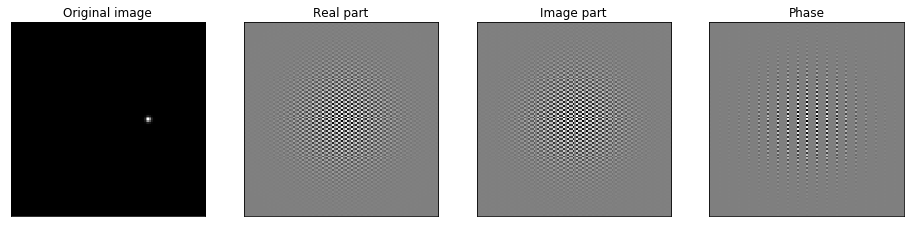

In [33]:
imgshape = [100, 100]
t_shift = [10,0]
img = gen_gaussian(imgshape, sigma_x=0.5, sigma_y=0.5, mu_x=t_shift[0], mu_y=t_shift[1], step=0.5)

img_fft = fftpack.fftshift(fftpack.fftn(img))
img_ifft = fftpack.ifftn(fftpack.ifftshift(img_fft))

img_real = np.real(img_fft)
img_imag = np.imag(img_fft)
img_phase = img_real / (img_imag + 1e-5)

# Display
plt.rcParams["figure.figsize"] = [16.0, 6.0]
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1])

ax0 = plt.subplot(gs[0])
ax0.imshow(img, cmap='gray')
ax0.set_xticks([])
ax0.set_yticks([])
plt.title('Original image')

ax1 = plt.subplot(gs[1])
ax1.imshow(gen_norm(img_real), cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title('Real part')

ax2 = plt.subplot(gs[2])
ax2.imshow(gen_norm(img_imag), cmap='gray')
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('Image part')

ax3 = plt.subplot(gs[3])
ax3.imshow(gen_norm(img_phase), cmap='gray')
ax3.set_xticks([])
ax3.set_yticks([])
plt.title('Phase')

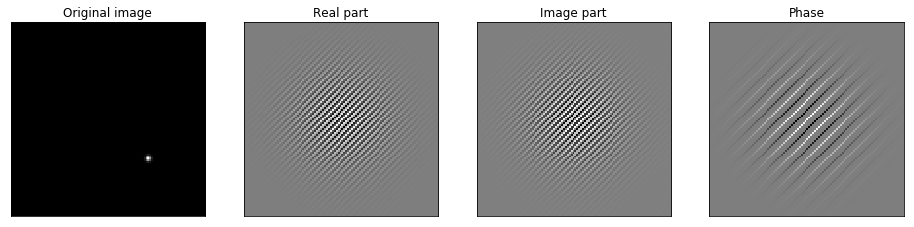

In [34]:
imgshape = [100, 100]
t_shift = [10,10]
img = gen_gaussian(imgshape, sigma_x=0.5, sigma_y=0.5, mu_x=t_shift[0], mu_y=t_shift[1], step=0.5)

img_fft = fftpack.fftshift(fftpack.fftn(img))
img_ifft = fftpack.ifftn(fftpack.ifftshift(img_fft))

img_real = np.real(img_fft)
img_imag = np.imag(img_fft)
img_phase = img_real / (img_imag + 1e-5)

# Display
plt.rcParams["figure.figsize"] = [16.0, 6.0]
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1])

ax0 = plt.subplot(gs[0])
ax0.imshow(img, cmap='gray')
ax0.set_xticks([])
ax0.set_yticks([])
plt.title('Original image')

ax1 = plt.subplot(gs[1])
ax1.imshow(gen_norm(img_real), cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title('Real part')

ax2 = plt.subplot(gs[2])
ax2.imshow(gen_norm(img_imag), cmap='gray')
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('Image part')

ax3 = plt.subplot(gs[3])
ax3.imshow(gen_norm(img_phase), cmap='gray')
ax3.set_xticks([])
ax3.set_yticks([])
plt.title('Phase')

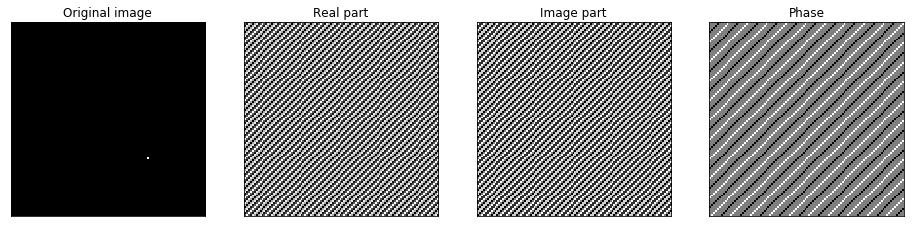

In [35]:
imgshape = [100, 100]
t_shift = [10,10]
img = gen_gaussian(imgshape, sigma_x=0.1, sigma_y=0.1, mu_x=t_shift[0], mu_y=t_shift[1], step=0.5)

img_fft = fftpack.fftshift(fftpack.fftn(img))
img_ifft = fftpack.ifftn(fftpack.ifftshift(img_fft))

img_real = np.real(img_fft)
img_imag = np.imag(img_fft)
img_phase = img_real / (img_imag + 1e-5)

# Display
plt.rcParams["figure.figsize"] = [16.0, 6.0]
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1])

ax0 = plt.subplot(gs[0])
ax0.imshow(img, cmap='gray')
ax0.set_xticks([])
ax0.set_yticks([])
plt.title('Original image')

ax1 = plt.subplot(gs[1])
ax1.imshow(gen_norm(img_real), cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title('Real part')

ax2 = plt.subplot(gs[2])
ax2.imshow(gen_norm(img_imag), cmap='gray')
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('Image part')

ax3 = plt.subplot(gs[3])
ax3.imshow(gen_norm(img_phase), cmap='gray')
ax3.set_xticks([])
ax3.set_yticks([])
plt.title('Phase')